In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('border.csv')

In [5]:
data

,country_code,country_name,country_border_code,country_border_name
0,AD,Andorra,FR,France
1,AD,Andorra,ES,Spain
2,AE,United Arab Emirates,OM,Oman
3,AE,United Arab Emirates,SA,Saudi Arabia
4,AF,Afghanistan,CN,China
...,...,...,...,...
723,ZM,Zambia,ZW,Zimbabwe
724,ZW,Zimbabwe,BW,Botswana
725,ZW,Zimbabwe,MZ,Mozambique
726,ZW,Zimbabwe,ZA,South Africa


In [42]:
# Identify na rows && Dropping Them

data.isna().sum()
data =data.dropna()

In [43]:
# Identify how many borders there are
country_codes = [_ for _ in data['country_border_code'].unique()]
len(country_codes)

162

In [44]:
# Function to Easily Identify the Country Name and Country Code
def checkbdcode(code):
    try:   return  data.loc[data['country_code'] == code]['country_name'].iloc[0]
    except:   return 'Invalid Country Code'
def checkbdname(name):
    try:   return data.loc[data['country_name'] == name]['country_code'].iloc[0]
    except:   return 'Invalid Country Name'

In [45]:
# Storing the number of countries a country shares a border 
ii = {}
for ic in country_codes:
    vald = data.loc[data['country_border_code'] == ic]
    
    try:
        ii[str(len(vald))]= vald['country_border_code'].iloc[0]
    except:pass
       

In [46]:
xcs = [int(x) for x in ii.keys()]
xca =  [x for x in ii.values()]
cd =pd.DataFrame()
cd['Countries']=xca
cd['Border Number']=xcs

<AxesSubplot:xlabel='Countries'>

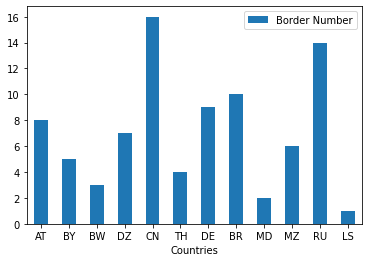

In [47]:
cd.plot.bar(x='Countries', y='Border Number', rot=0)

Visually, China shares the most borders.

In [54]:
checkbdcode('US') # To check the name of country in the dataframe using the Country Code
checkbdname('Nigeria') # To check the code of country in the dataframe using the Country Name

'NG'

In [49]:
# Function to plot a network graph of countries sharing borders.

def plotcountry():
    boxx=[]
    mainx ={}
  
    dd = [[z,a] for z,a in zip(data.loc[data['country_border_code'] == kk]['country_name'],data.loc[data['country_border_code'] == kk]['country_border_name']) ]
    boxx.append(dd)
    def plotnet(ddd):
        G=nx.Graph()
        for c in ddd:
            G.add_edge(c[0], c[1])

        nx.draw(G, with_labels=True, font_weight='bold')
        plt.show()
    for ik in boxx:
        plotnet(ik)

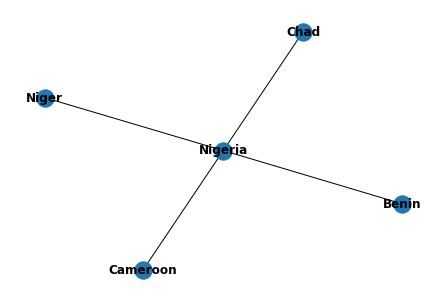

In [50]:
plotcountry('NG')

In [55]:
def plotall():
    boxx=[]
    mainx ={}
    for kk in country_codes:
        dd = [[z,a] for z,a in zip(data.loc[data['country_border_code'] == kk]['country_name'],data.loc[data['country_border_code'] == kk]['country_border_name']) ]
        boxx.append(dd)
    def plotnet(ddd):
        G=nx.Graph()
        for c in ddd:
            G.add_edge(c[0], c[1])

        nx.draw(G, with_labels=True, font_weight='bold')
        plt.show()
    for ik in boxx:
        plotnet(ik)
     

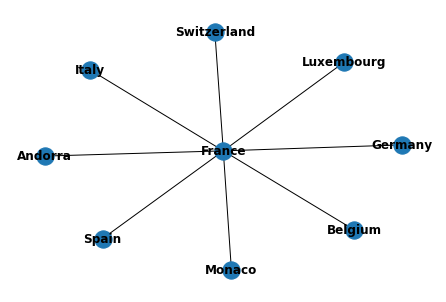

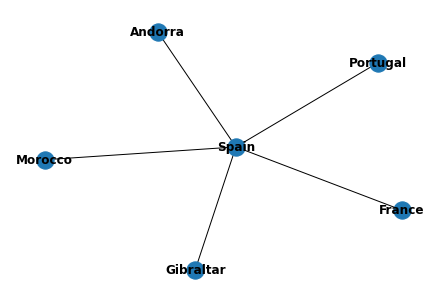

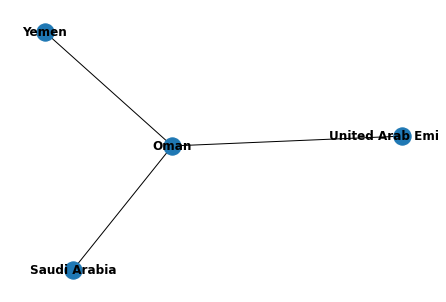

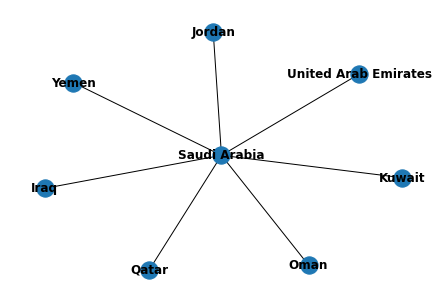

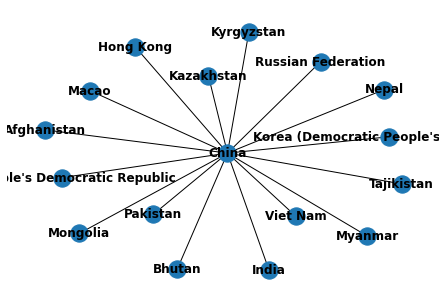

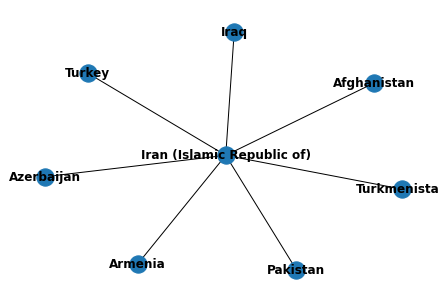

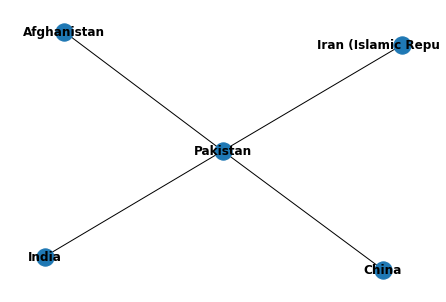

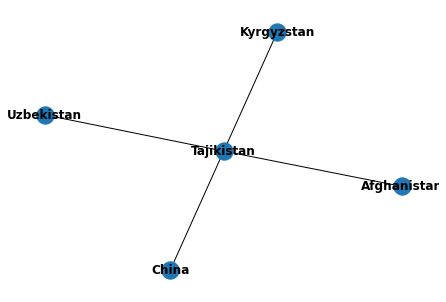

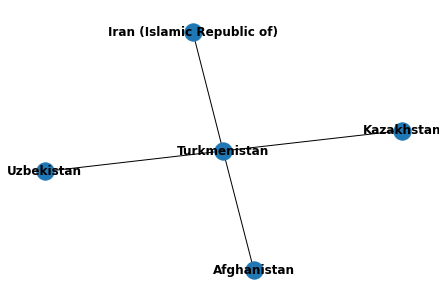

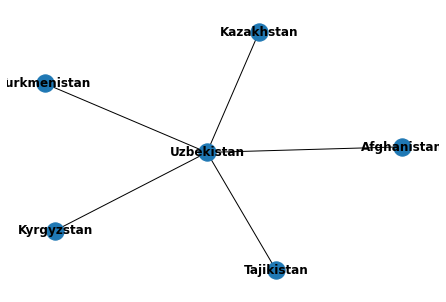

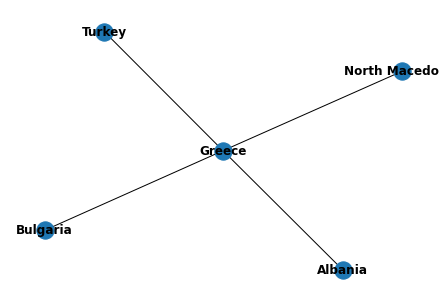

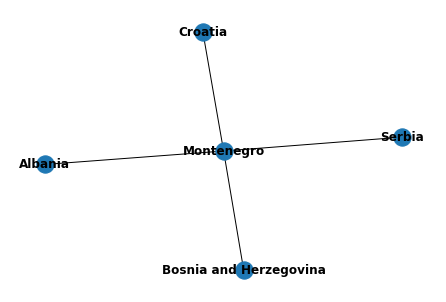

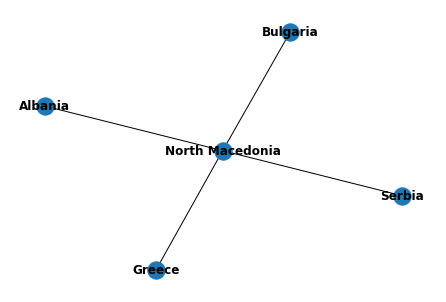

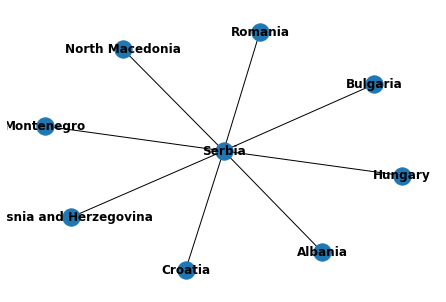

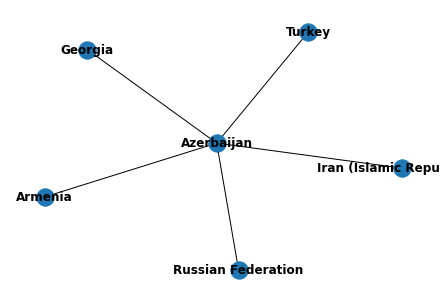

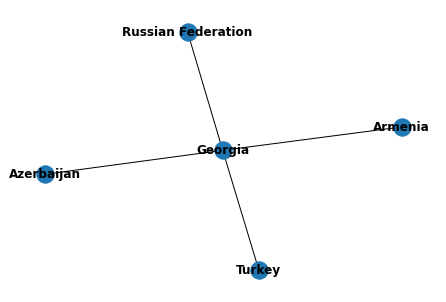

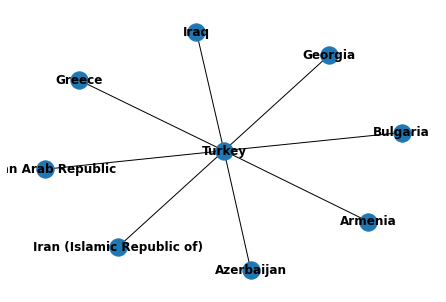

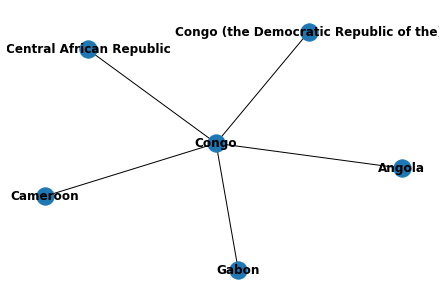

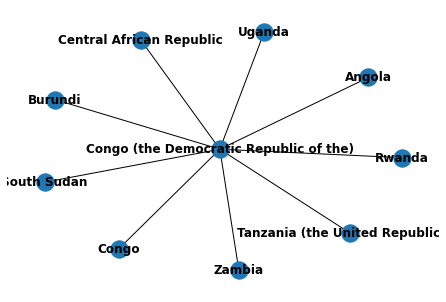

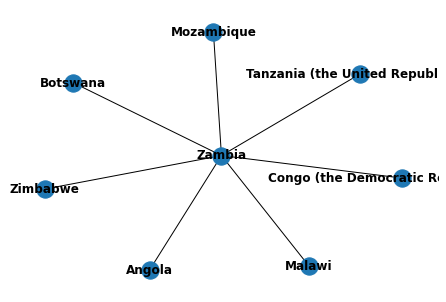

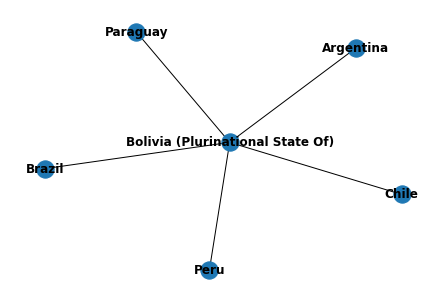

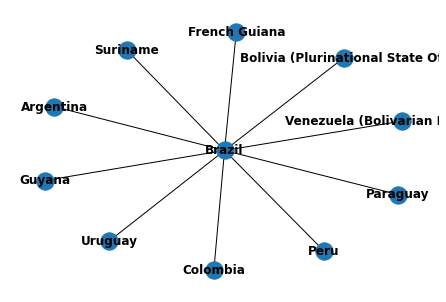

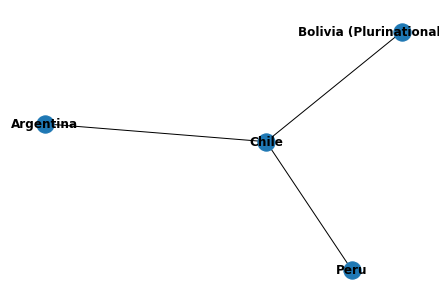

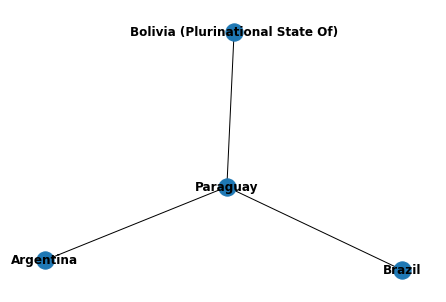

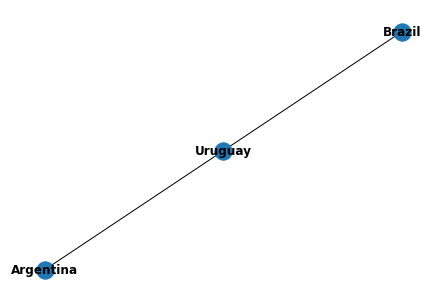

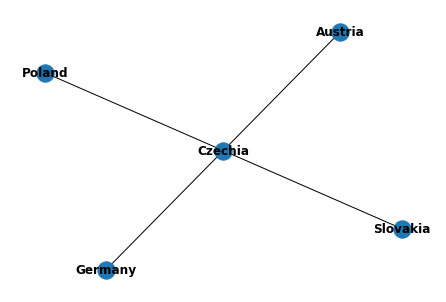

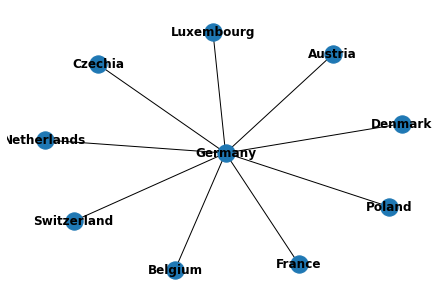

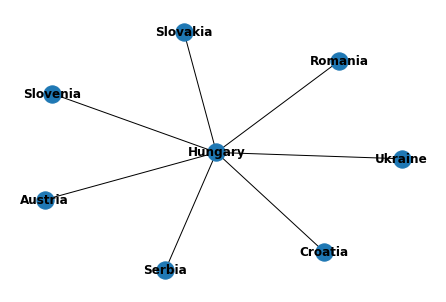

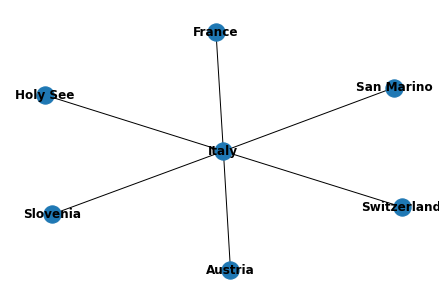

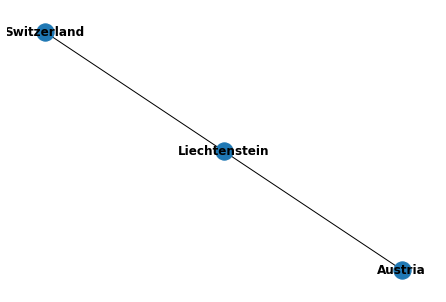

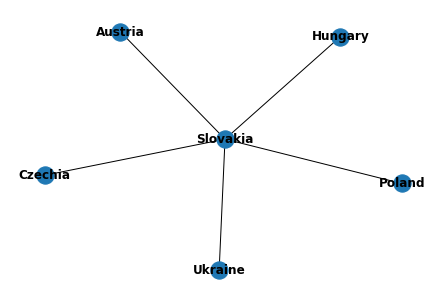

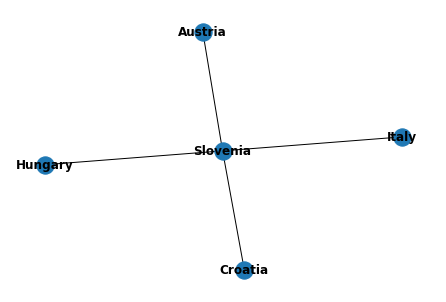

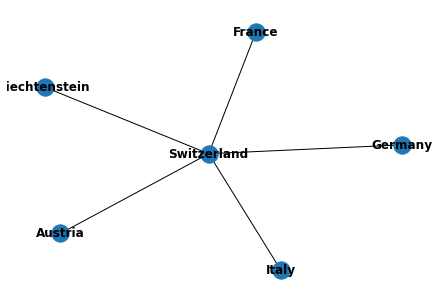

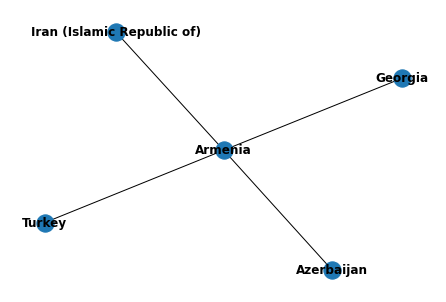

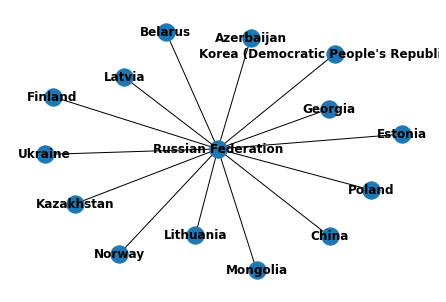

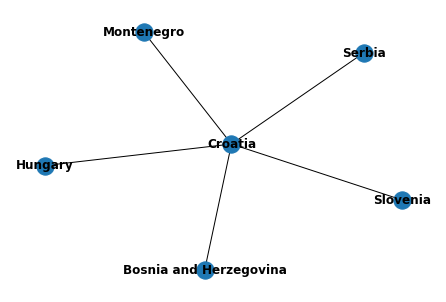

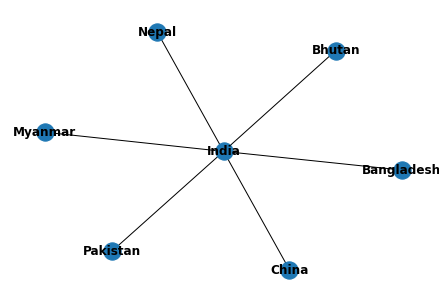

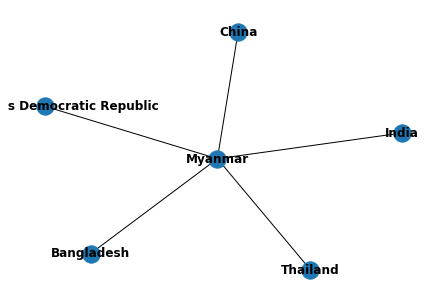

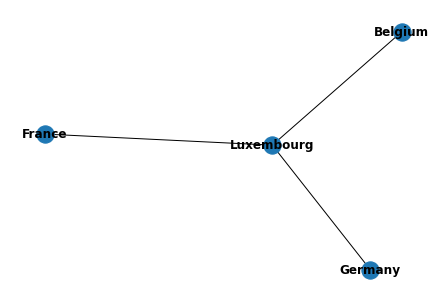

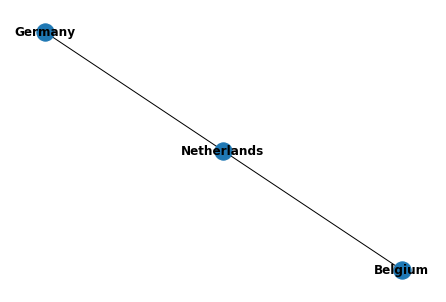

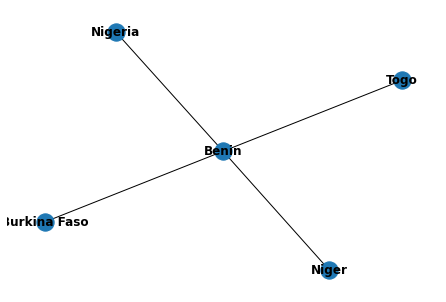

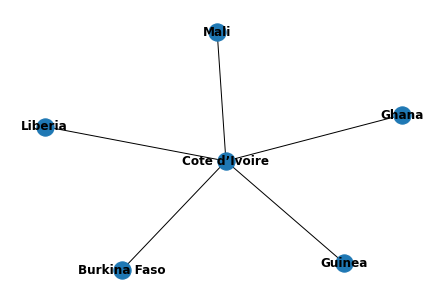

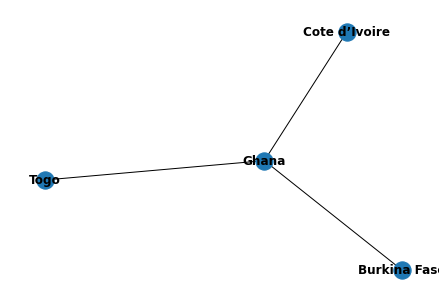

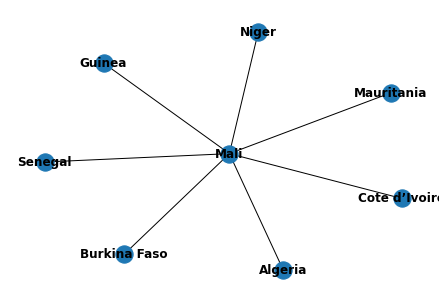

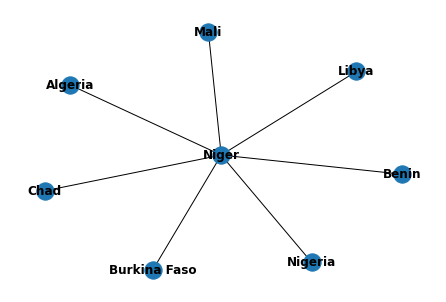

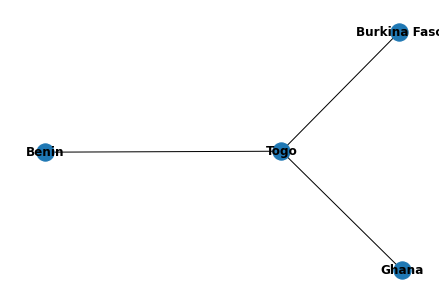

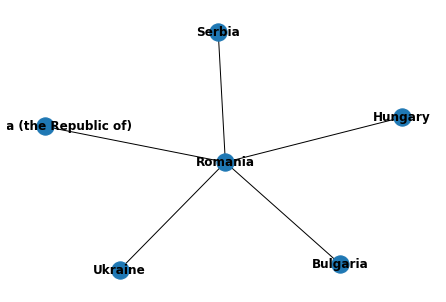

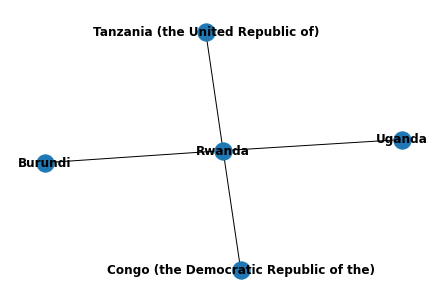

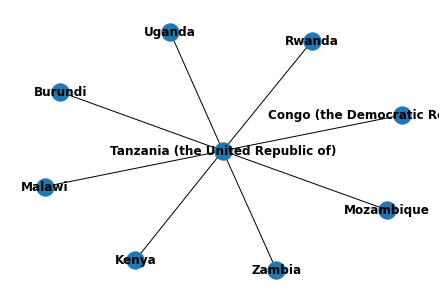

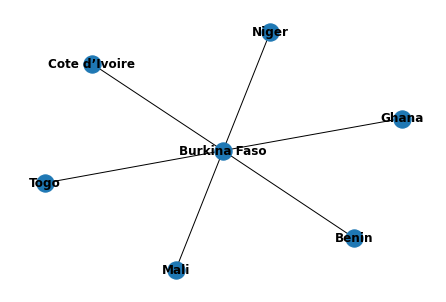

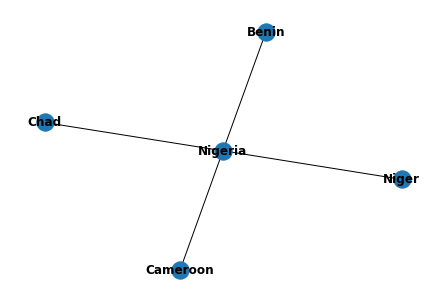

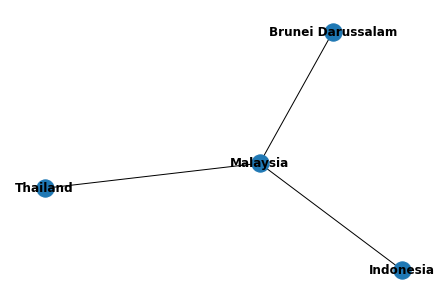

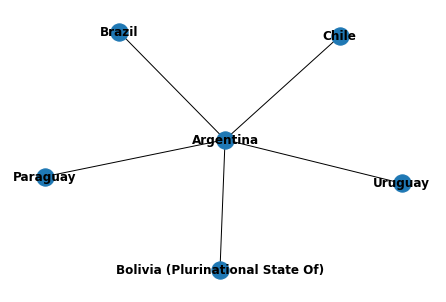

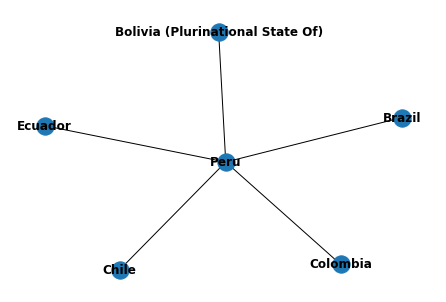

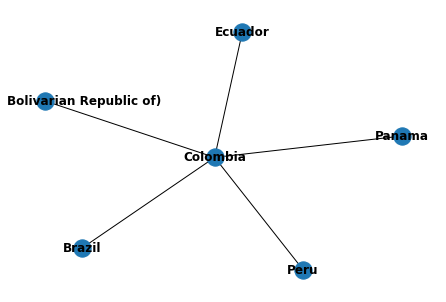

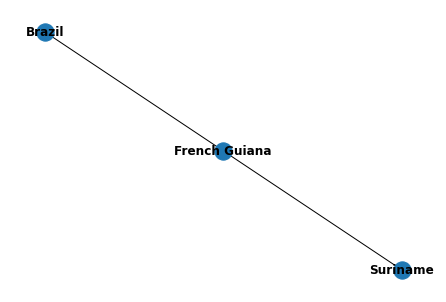

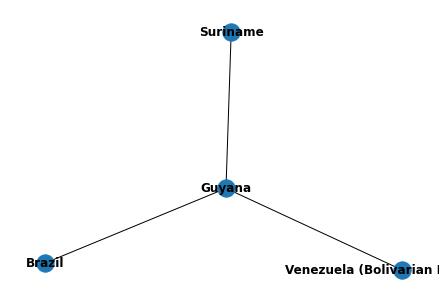

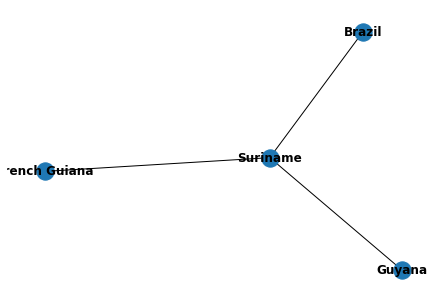

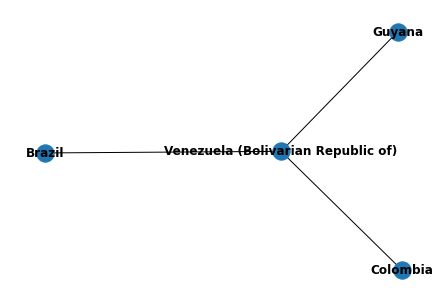

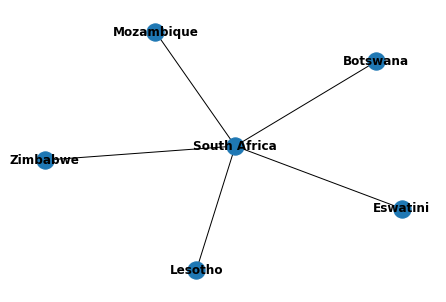

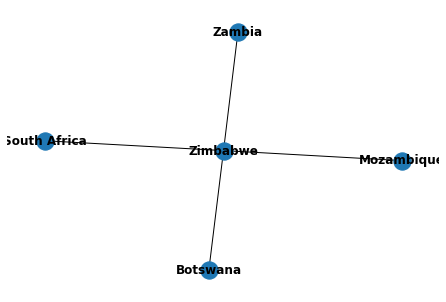

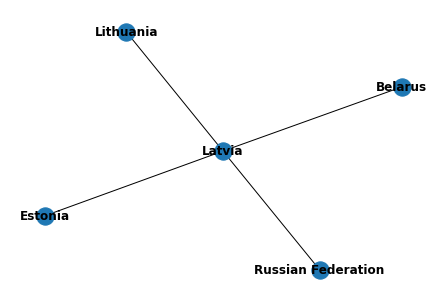

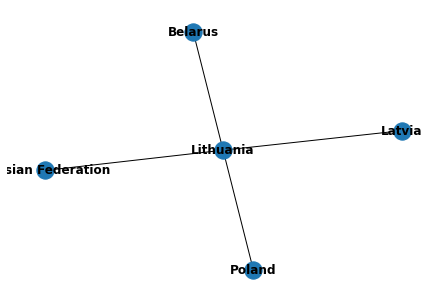

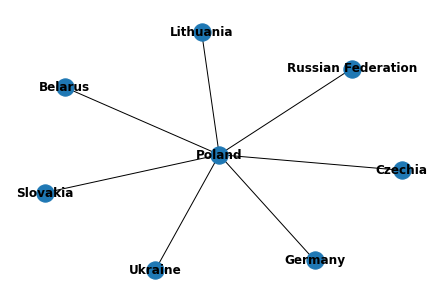

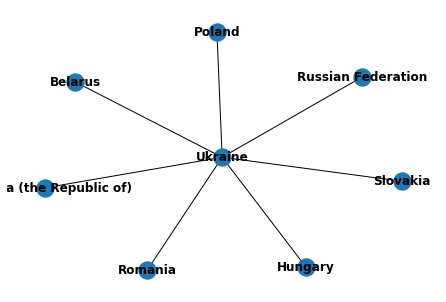

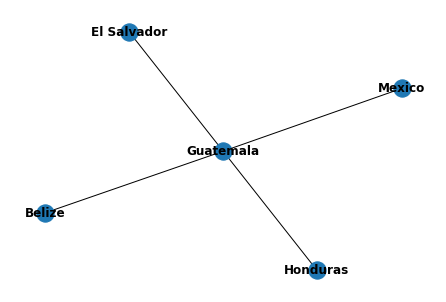

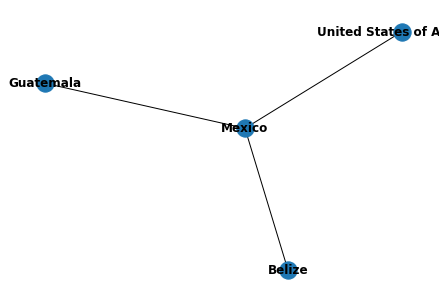

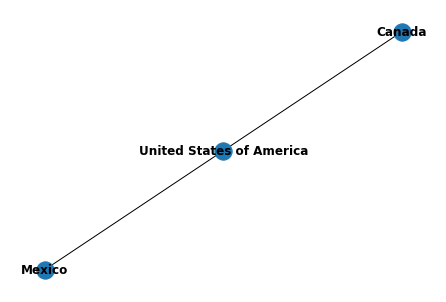

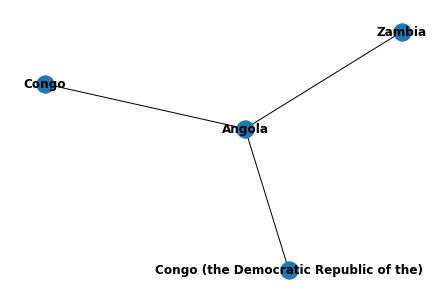

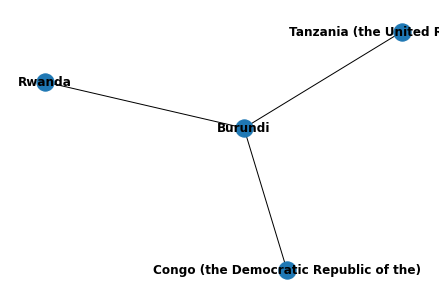

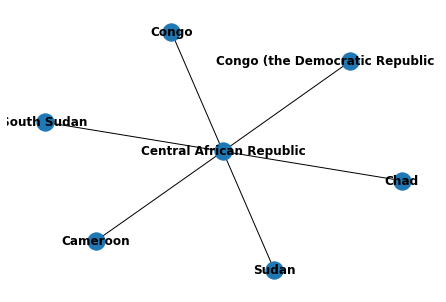

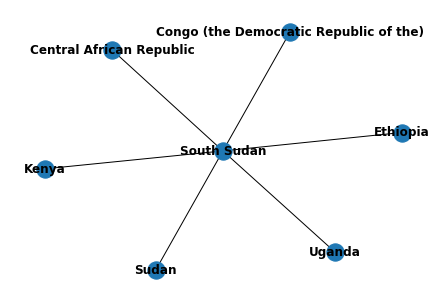

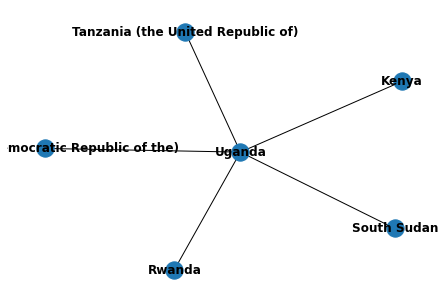

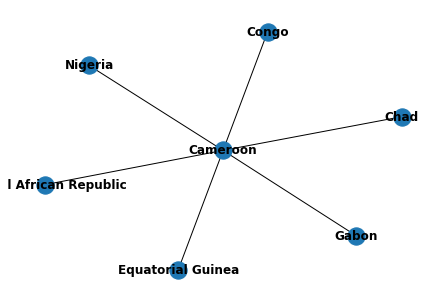

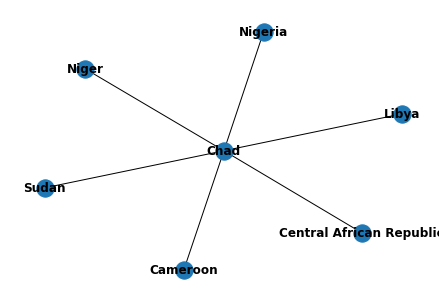

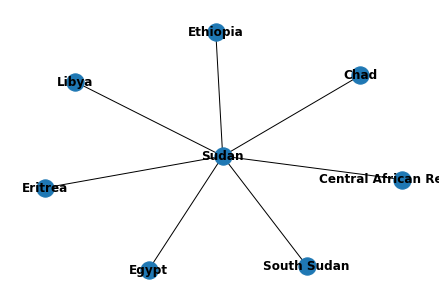

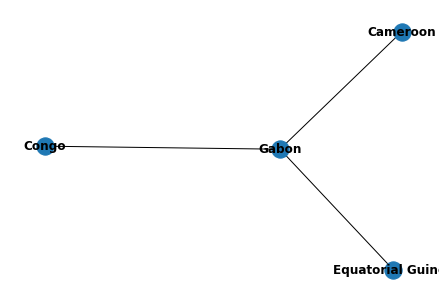

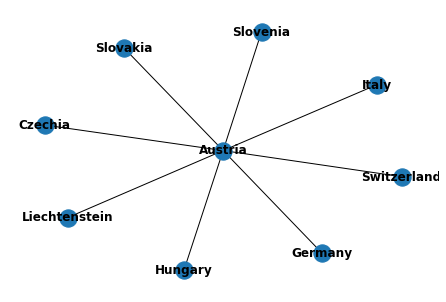

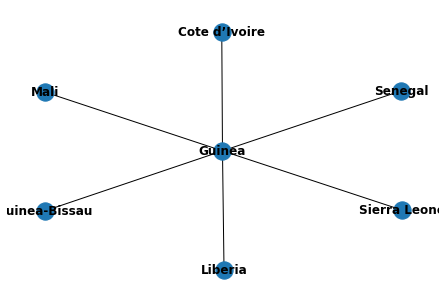

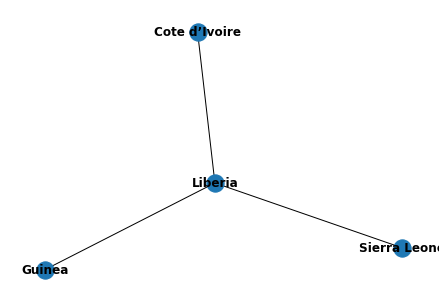

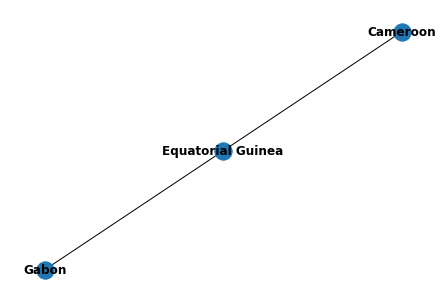

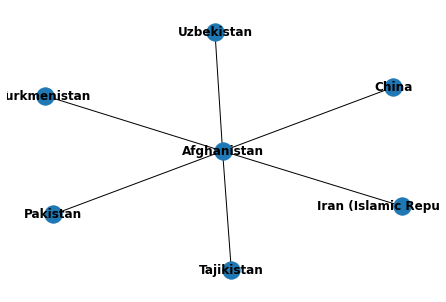

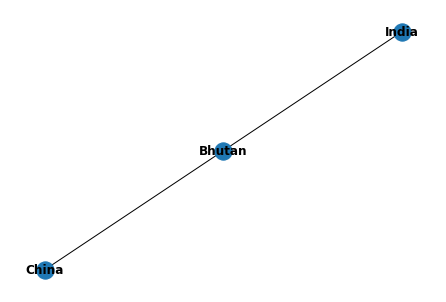

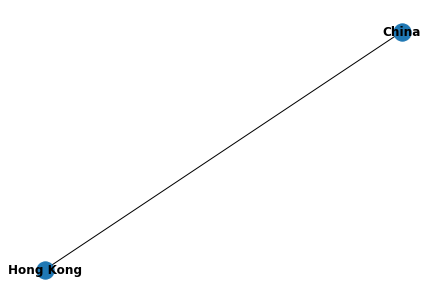

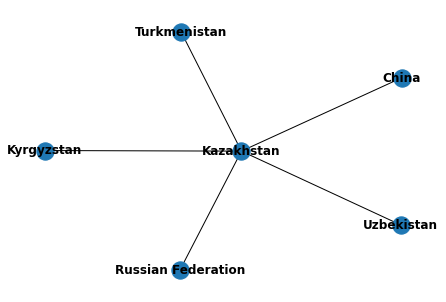

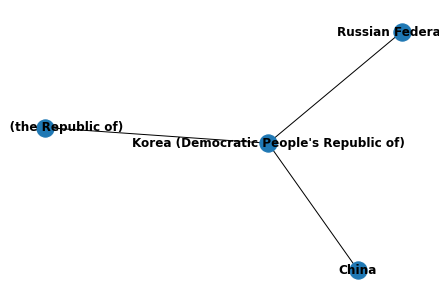

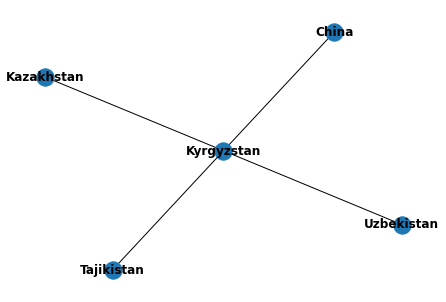

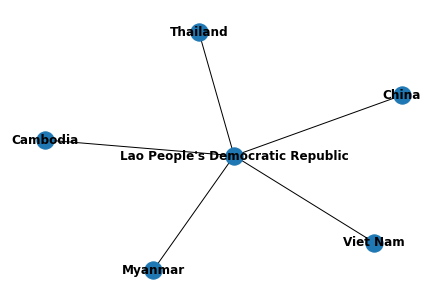

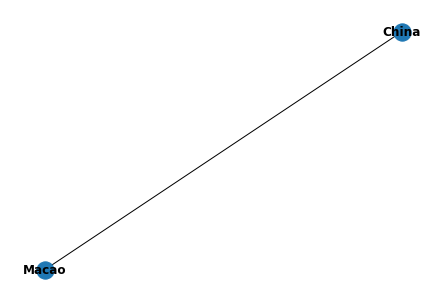

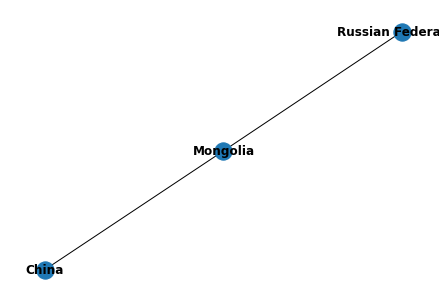

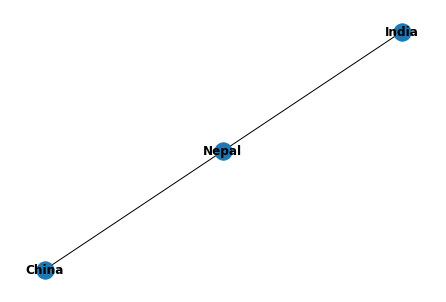

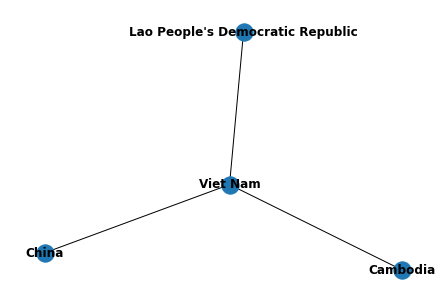

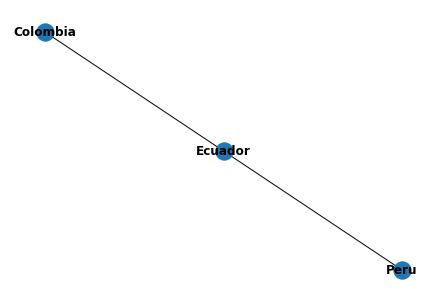

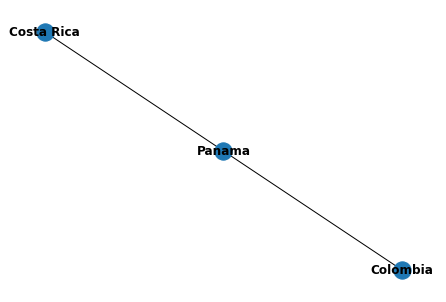

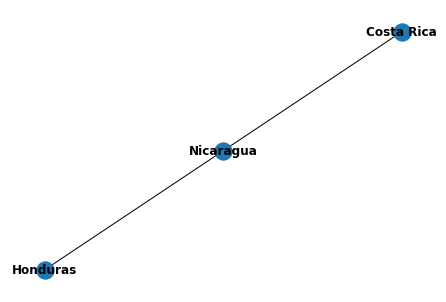

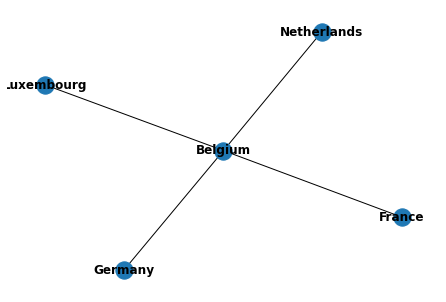

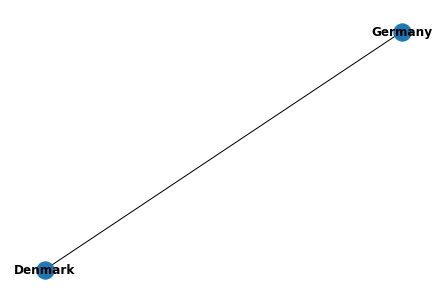

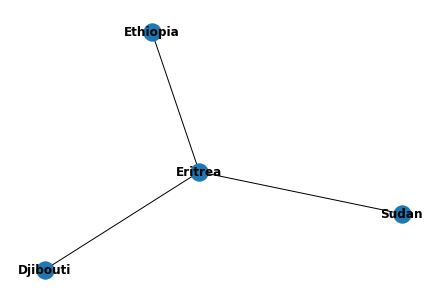

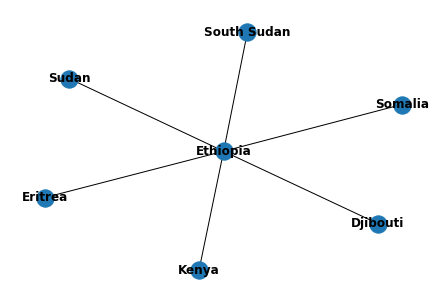

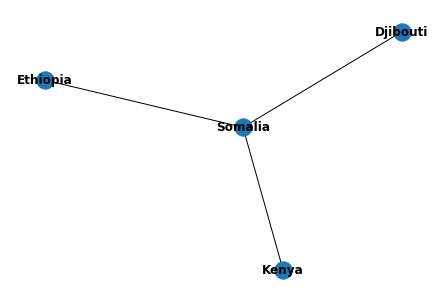

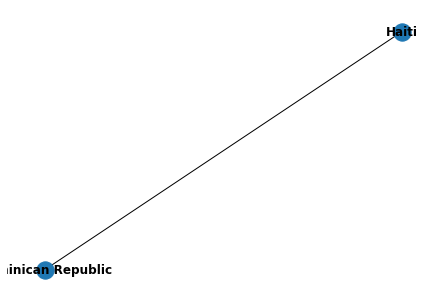

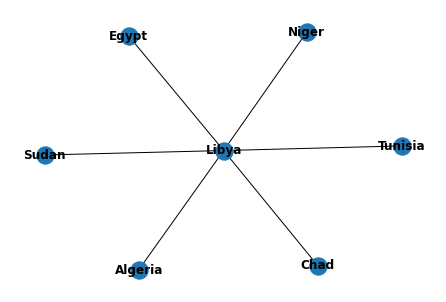

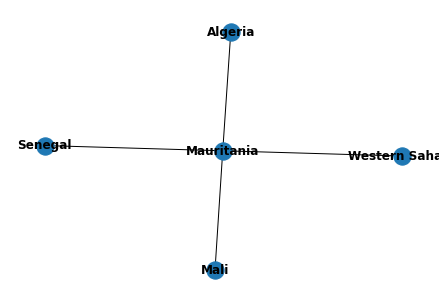

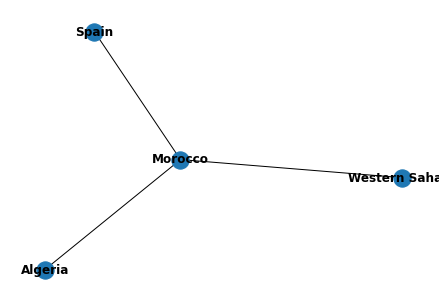

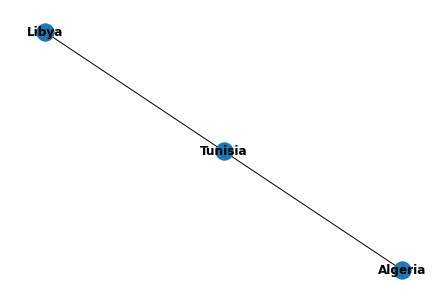

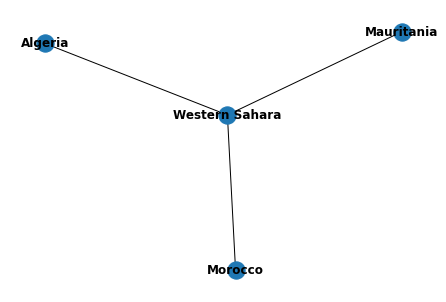

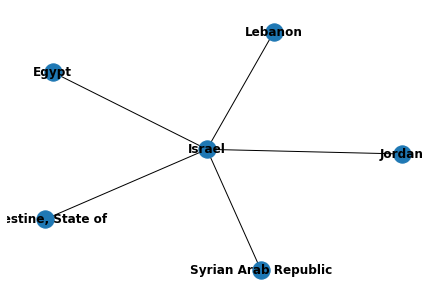

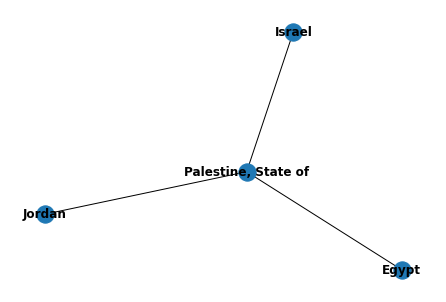

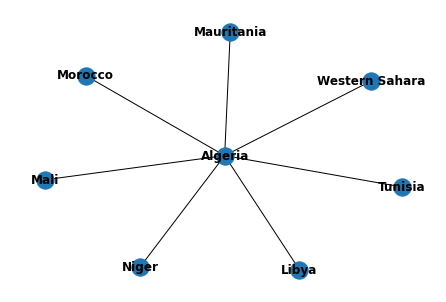

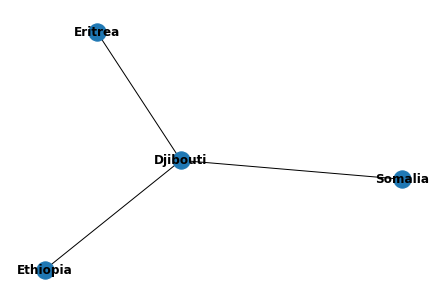

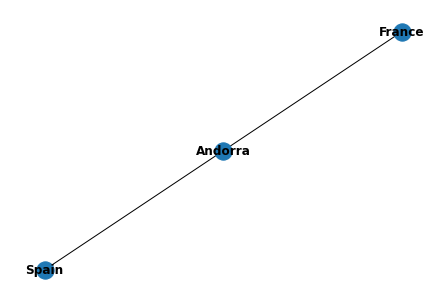

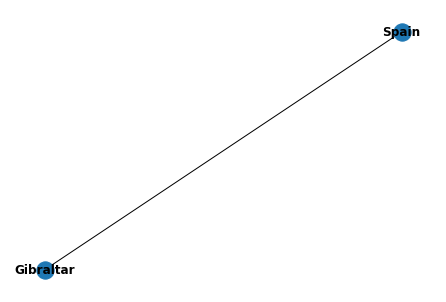

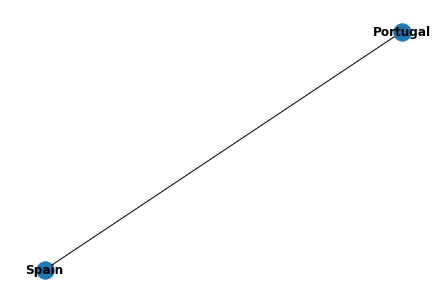

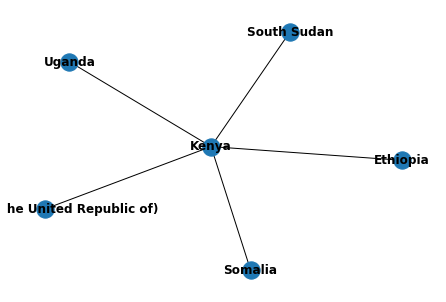

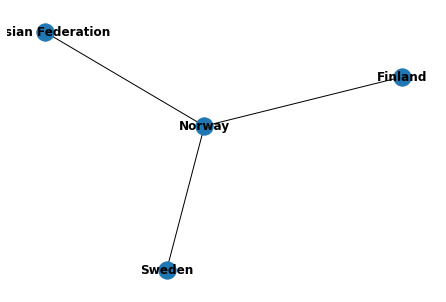

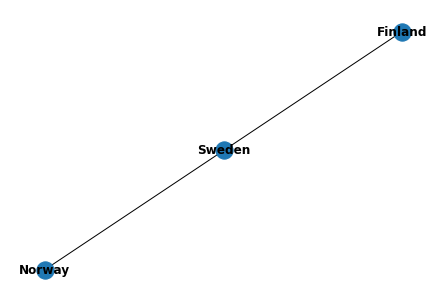

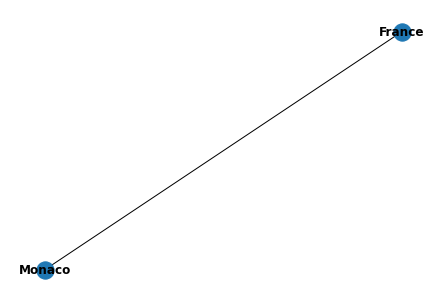

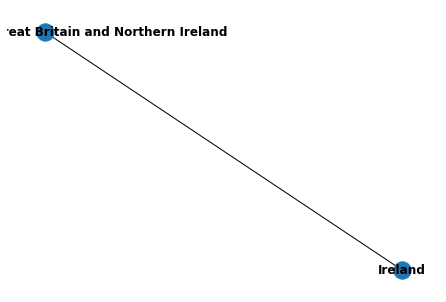

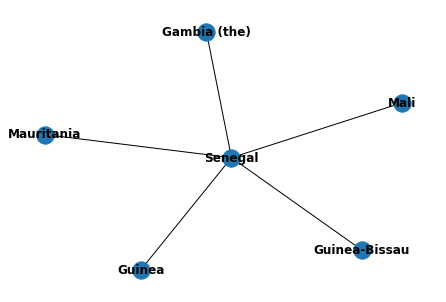

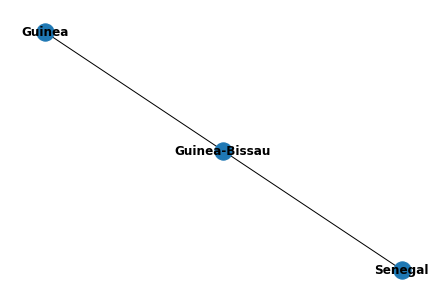

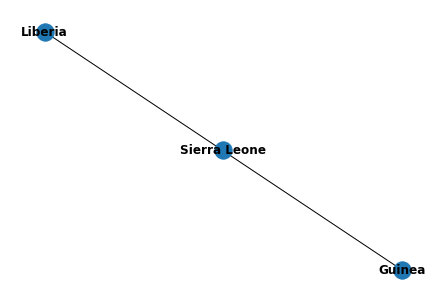

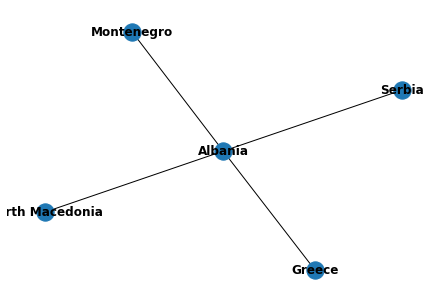

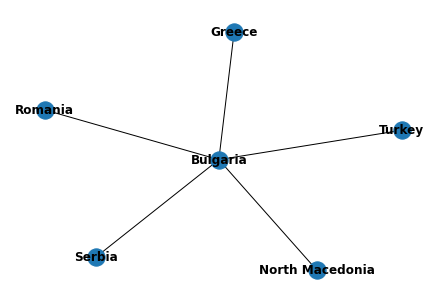

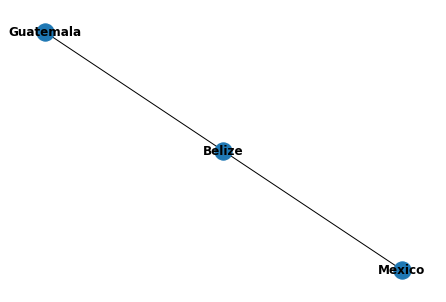

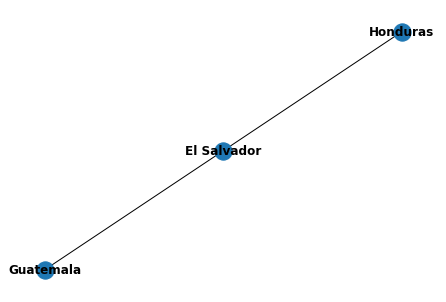

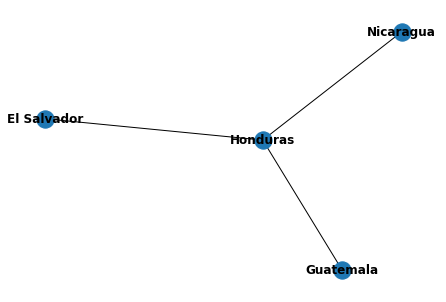

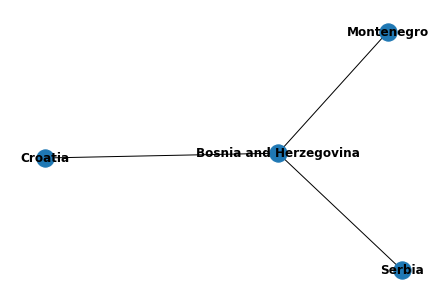

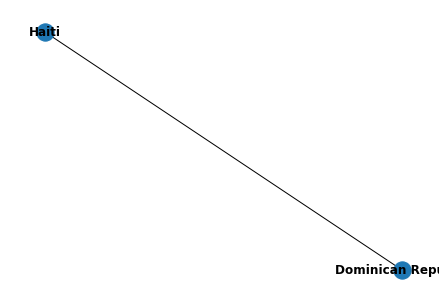

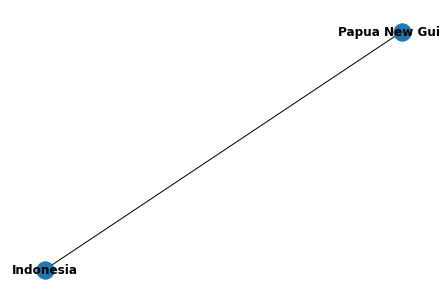

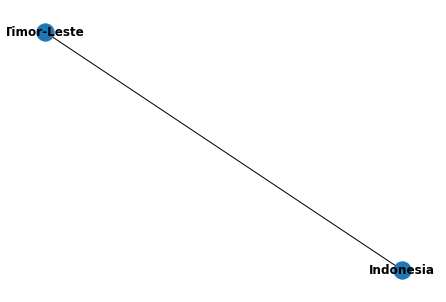

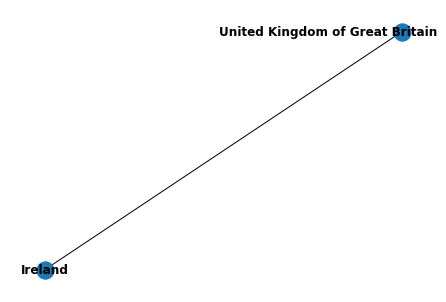

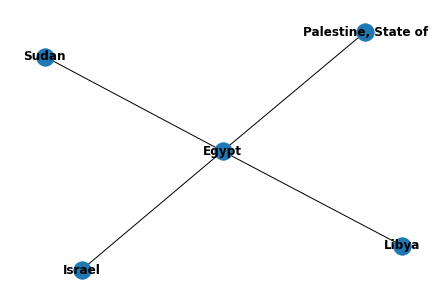

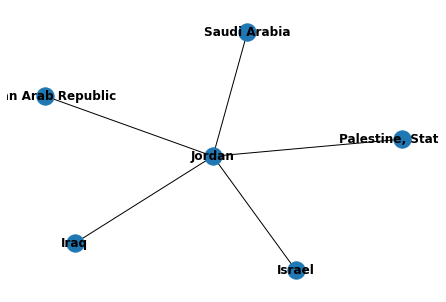

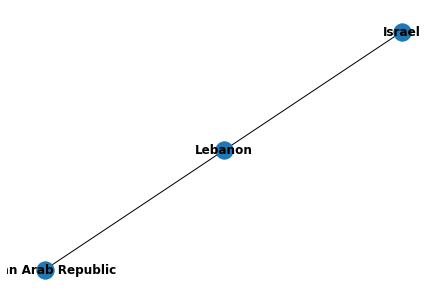

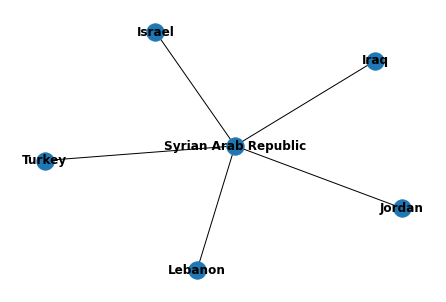

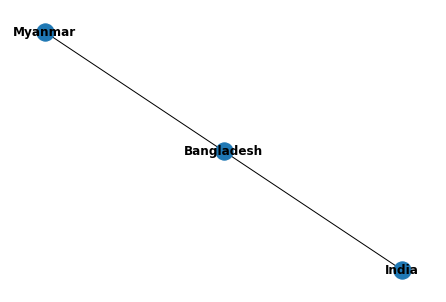

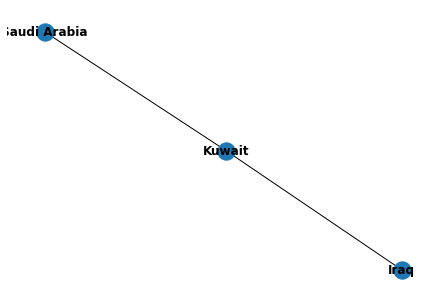

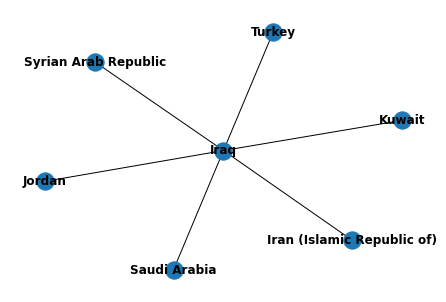

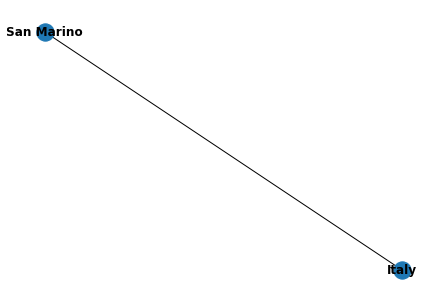

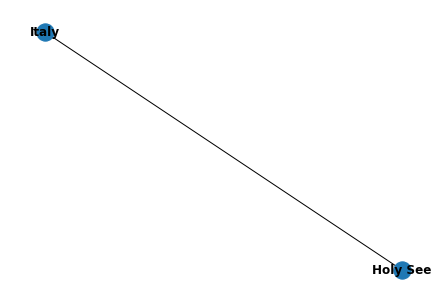

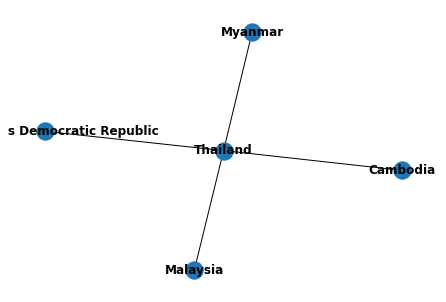

In [ ]:
plotall()